In [1]:
import numpy as np
import pandas as pd

In [63]:
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    print(W)
    b = np.random.rand(1)[0] + x_max
    print(b)
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [64]:
data = pd.read_csv('data.csv')
y = data.iloc[:,2]
y = y.to_numpy()
x = data.iloc[:,:-1]
x = x.to_numpy()
x_new = np.zeros((x.shape[0]+1,2))
x_new[0][:] = [0.78051,-0.063669]
x_new[1:][:] = x
y_new = np.zeros(y.shape[0]+1)
y_new[0] = 1
y_new[1:] = y
a = trainPerceptronAlgorithm(x_new,y_new,0.01,100)

[[0.37454012]
 [0.95071431]]
1.731993941811405


In [65]:
params = a[-1]
print(params)

(array([-0.71707002]), array([0.81368247]))


[[0.25400215 0.8593376 ]
 [0.60735274 0.60473543]
 [0.52173458 0.68548469]
 [0.6040829  0.51129404]
 [0.44853607 0.56087226]
 [0.61444456 0.73622456]
 [0.6162946  0.57545029]
 [0.49817883 0.58963394]
 [0.57305528 0.50545709]
 [0.64554389 0.63451535]
 [0.8076238  0.71574504]
 [0.72462954 0.57278279]
 [0.62979703 0.50803854]
 [0.48447562 0.52379974]
 [0.49424928 0.49016199]
 [0.51094985 0.66942232]
 [0.45828105 0.6599068 ]
 [0.59248071 0.63939143]
 [0.52895547 0.49503089]
 [0.57744375 0.53246912]
 [0.52155531 0.5249112 ]
 [0.59096052 0.45011363]
 [0.45774325 0.48824741]
 [0.741452   0.58384001]
 [0.31240033 0.54616515]
 [0.60023223 0.31425754]
 [0.70541206 0.40250735]
 [0.69588937 0.614631  ]
 [0.57519215 0.77355236]
 [0.42832187 0.60833512]
 [0.6738323  0.54923421]
 [0.524861   0.78847889]
 [0.66097524 0.41808211]
 [0.46628355 0.40501709]
 [0.63100171 0.56560492]
 [0.65789183 0.60830644]
 [0.33268624 0.47997242]
 [0.54012025 0.4822527 ]
 [0.42762631 0.57866994]
 [0.46597521 0.62673514]


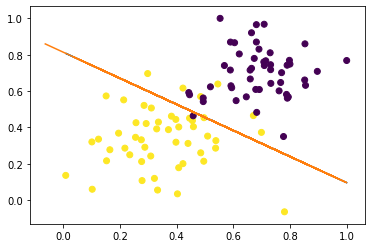

In [66]:
import matplotlib.pyplot as plt
colors = [i for i in y_new]
w1, w2 = params[0].item(),params[1].item()
xs = x_new
ys = xs *w1 + w2
print(ys)
plt.plot(xs,ys)
plt.scatter(x_new[:,0],x_new[:,1],c=colors)